# Scanpy compatibility

Since Swan now uses the [AnnData data structure](https://anndata.readthedocs.io/en/latest/) to track abundance for transcripts, TSSs, TESs, and edges, this makes these objects directly compatible with the amazing suite of [Scanpy preprocessing, analysis, and visualization tools](https://scanpy.readthedocs.io/en/stable/index.html).

For this brief overview of some cool things you can do with Swan, I'll be using the Swan object of the data from [my lab's 2021 preprint on LR-Split-seq](https://www.biorxiv.org/content/10.1101/2021.04.26.441522v1.full.pdf) to showcase how specifically Scanpy can be used for single-cell data.

In [11]:
import swan_vis as swan
import scanpy as sc

fname = '/Users/fairliereese/mortazavi_lab/data/c2c12_paper_2020/sc_pacbio/210618/c2c12.p'
sg = swan.read(fname)

Read in graph from /Users/fairliereese/mortazavi_lab/data/c2c12_paper_2020/sc_pacbio/210618/c2c12.p


## UMAP

Provide the corresponding AnnData from the SwanGraph and the name of the transcript / edge / TES / TSS you want to plot.

<AxesSubplot:title={'center':'Nisch_23'}, xlabel='UMAP1', ylabel='UMAP2'>

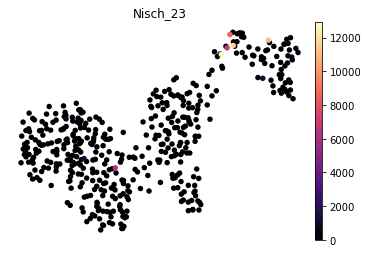

In [14]:
sc.pl.umap(sg.tss_adata, 
           color='Nisch_23', 
           gene_symbols='tss_name', 
           layer='tpm',
           frameon=False, 
           size=120, 
           show=False, 
           cmap='magma')

In [15]:
# add transcript name to sg.adata really quick
sg.adata.var = sg.adata.var.merge(sg.t_df, left_index=True, right_index=True)

... storing 'ill_umi_count' as categorical
... storing 'ill_gene_count' as categorical
... storing 'bc3' as categorical
... storing 'bc2' as categorical
... storing 'bc1' as categorical
... storing 'well' as categorical
... storing 'primer_type' as categorical
... storing 'raw_bc1' as categorical
... storing 'gid' as categorical
... storing 'gname' as categorical
... storing 'novelty' as categorical


<AxesSubplot:title={'center':'Tpm2-202'}, xlabel='UMAP1', ylabel='UMAP2'>

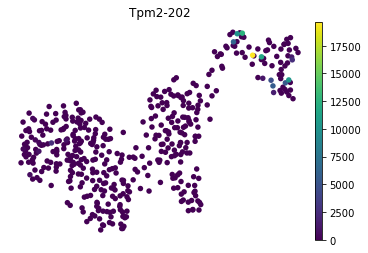

In [16]:
sc.pl.umap(sg.adata, 
           color='Tpm2-202', 
           gene_symbols='tname', 
           frameon=False, 
           size=120, 
           show=False, 
           layer='tpm',
           cmap='viridis')

<AxesSubplot:title={'center':'Tnnt2_18'}, xlabel='UMAP1', ylabel='UMAP2'>

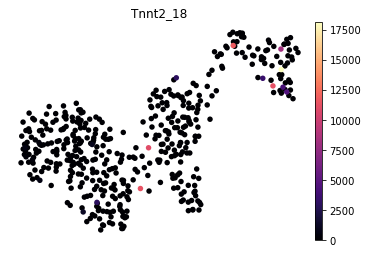

In [25]:
sc.pl.umap(sg.tes_adata, 
           color='Tnnt2_18', 
           gene_symbols='tes_name', 
           layer='tpm',
           frameon=False, 
           size=120, 
           show=False, 
           cmap='magma')

## Dotplots, matrixplots, and heatmaps

Scanpy provides many different options to visualize expression of multiple variables per group. Some of my favorites are [dotplots](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pl.dotplot.html), [matrixplots](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pl.matrixplot.html), and [heatmaps](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pl.heatmap.html).

Here, I'll plot the expression of each _Tpm2_ isoform per cluster using a dotplot. The cluster column name in `sg.adata.obs` is called `leiden`.

In [12]:
sg.adata.obs.leiden.head()

index
TGGAACAAGTGTTCTACGTTCGAG    3
GTACGCAATCCGTCTAACGCCGGC    2
AAGAGATCCCGTGAGAACGCCGGC    1
ACTATGCAACACGACCGTGCTAGC    5
CAATGGAACTAAGGTCGTTCAACA    1
Name: leiden, dtype: category
Categories (7, object): ['1', '2', '3', '4', '5', '6', '7']

In [13]:
tpm2_isos = sg.t_df.loc[sg.t_df.gname == 'Tpm2', 'tname'].tolist()
tpm2_isos

['ENCODEMT000193235',
 'ENCODEMT000193244',
 'ENCODEMT000193257',
 'ENCODEMT000193335',
 'ENCODEMT000193446',
 'ENCODEMT000193549',
 'ENCODEMT000193650',
 'ENCODEMT000193696',
 'ENCODEMT000193732',
 'ENCODEMT000193749',
 'ENCODEMT000193807',
 'ENCODEMT000193825',
 'ENCODEMT000194010',
 'ENCODEMT000194052',
 'ENCODEMT000194060',
 'ENCODEMT000194110',
 'ENCODEMT000194146',
 'ENCODEMT000194260',
 'ENCODEMT000194282',
 'ENCODEMT000194549',
 'ENCODEMT000194721',
 'ENCODEMT000194729',
 'ENCODEMT000194759',
 'ENCODEMT000194779',
 'ENCODEMT000194829',
 'Tpm2-201',
 'Tpm2-202',
 'Tpm2-203',
 'Tpm2-204',
 'Tpm2-205',
 'Tpm2-206']

In [15]:
# merge with transcript names and annotation information
sg.adata.var = sg.adata.var.merge(sg.t_df[['tname', 'annotation']], left_index=True, right_index=True)
sg.adata.var.head()

,tid,tname,annotation
tid,,,
ENCODEMT000141768,ENCODEMT000141768,ENCODEMT000141768,False
ENCODEMT000141769,ENCODEMT000141769,ENCODEMT000141769,False
ENCODEMT000141770,ENCODEMT000141770,ENCODEMT000141770,False
ENCODEMT000141771,ENCODEMT000141771,ENCODEMT000141771,False
ENCODEMT000141772,ENCODEMT000141772,ENCODEMT000141772,False


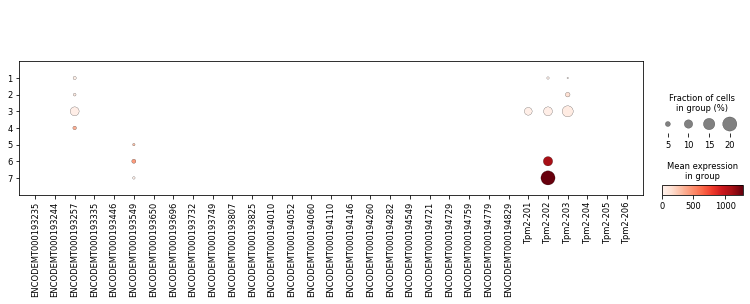

In [32]:
sc.pl.dotplot(sg.adata, 
              var_names=tpm2_isos, 
              layer='tpm',
              groupby='leiden',
              gene_symbols='tname')

Here, I'll use a heatmap to show the expression of each known isoform of _Tpm2_ in each cluster.

In [33]:
# limit to just the annotated isoforms
tpm2_known_isos = sg.t_df.loc[(sg.t_df.gname == 'Tpm2')&(sg.t_df.annotation == True), 'tname'].tolist()
tpm2_known_isos 

['Tpm2-201', 'Tpm2-202', 'Tpm2-203', 'Tpm2-204', 'Tpm2-205', 'Tpm2-206']

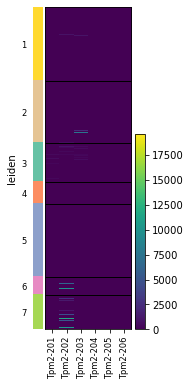

In [34]:
sc.pl.heatmap(sg.adata, 
              var_names=tpm2_known_isos, 
              layer='tpm',
              groupby='leiden',
              gene_symbols='tname')

I can also plot using different metadata to group the cells by, like the input sample:

In [35]:
sg.adata.obs['sample'].head()

index
TGGAACAAGTGTTCTACGTTCGAG     MB_cells
GTACGCAATCCGTCTAACGCCGGC    MB_nuclei
AAGAGATCCCGTGAGAACGCCGGC    MB_nuclei
ACTATGCAACACGACCGTGCTAGC    MT_nuclei
CAATGGAACTAAGGTCGTTCAACA    MB_nuclei
Name: sample, dtype: category
Categories (3, object): ['MB_cells', 'MB_nuclei', 'MT_nuclei']

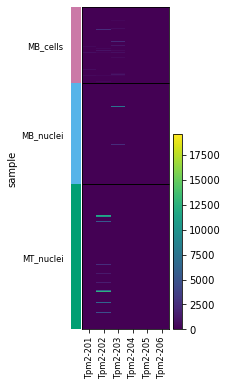

In [36]:
mp = sc.pl.heatmap(sg.adata, 
              var_names=tpm2_known_isos, 
              layer='tpm',
              groupby='sample',
              gene_symbols='tname')

Here's the same data plotted in a matrix plot, which aggregates expression across each category (but doesn't show the colors for each category).

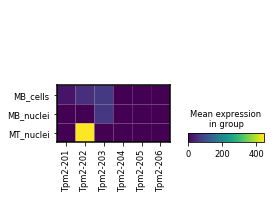

In [37]:
mp = sc.pl.matrixplot(sg.adata, 
              var_names=tpm2_known_isos, 
              layer='tpm',
              groupby='sample',
              gene_symbols='tname')

Of course, you can make all the above plots with TSS or TES expression data as well! Such as the dotplot below for different TSSs of _Nisch_.

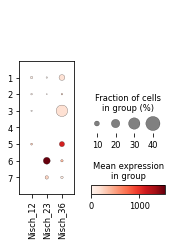

In [39]:
nisch_tss = sg.tss_adata.var.loc[sg.tss_adata.var.gname == 'Nisch', 'tss_name'].tolist()
nisch_tss = ['Nisch_12', 'Nisch_23', 'Nisch_36']
sc.pl.dotplot(sg.tss_adata, 
              var_names=nisch_tss, 
              layer='tpm',
              groupby='leiden',
              gene_symbols='tss_name')

## Violin plots

Scanpy also offers [violin plots](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pl.violin.html) which are often used to visualize expression distributions of different categories. 

First, I'll show the expression of a single isoform across the different identified cell types:

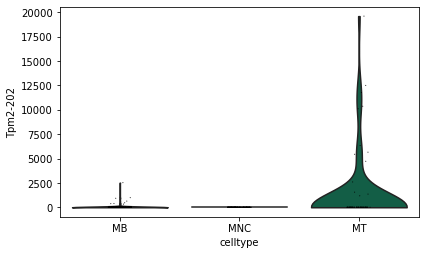

In [51]:
tname = 'Tpm2-202'
tid = sg.adata.var.loc[sg.adata.var.tname == tname, 'tid'].values[0]
sc.pl.violin(sg.adata,
             keys=tid,
             groupby='celltype',
             layer='tpm',
             ylabel=tname)

Of course you can also plot the expression of TSSs and TESs from your SwanGraph using this strategy as well, as shown below.

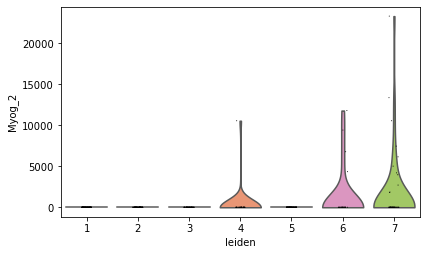

In [63]:
tes_name = 'Myog_2'
tss_id = sg.tes_adata.var.loc[sg.tes_adata.var.tes_name == tes_name].index.values[0]
sc.pl.violin(sg.tes_adata,
             keys=tss_id,
             groupby='leiden',
             layer='tpm',
             ylabel=tes_name)